In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [96]:
win=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")

In [97]:
win=win.rename(columns={"quality":"Quality_Target"})

In [98]:
win.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Target
1459,7.9,0.200,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7
1376,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.0,5
1108,8.1,0.780,0.10,3.3,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,5
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
1192,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,7


In [99]:
win.shape

(1599, 12)

In [100]:
win.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
Quality_Target            int64
dtype: object

In [101]:
win.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
Quality_Target          0
dtype: int64

<AxesSubplot:>

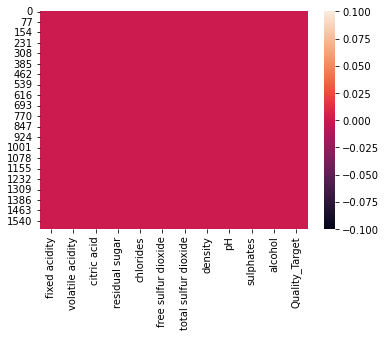

In [102]:
sns.heatmap(win.isnull())

Observation-1 :

In the above dataset :

    1) All the input data are continous in nature(absence of categorical data),So there is no need to converting the values into the numeric format i.e Encoading will not be used.
    
    2)The size of table is 1599*12 i.e no. of rows are 1599 and no. of columns are 12(including target).
    
    3)Null values are not present, so there is no need to adopt imputation technique.

# EDA- 
    Exploratory Data Analysis (EDA): EDA process will give us the batter understanding towards the pattern of Dataset

<AxesSubplot:xlabel='Quality_Target', ylabel='count'>

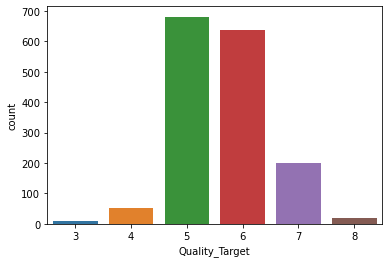

In [103]:
sns.countplot(win["Quality_Target"])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1794e4bd4c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1794e4bd430>,
 'cmins': <matplotlib.collections.LineCollection at 0x1794e4bda00>,
 'cbars': <matplotlib.collections.LineCollection at 0x1794e4bdd30>}

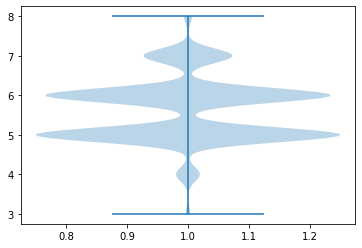

In [104]:
plt.violinplot(win['Quality_Target'])

Observation-2 :
    
    1) In the dataset we have 6 types of wine quality.
    
    2) We can say the quality type 5 and type 6 are most occurring.
    
    3) Wine quality -
             
            *Type 8 is primium quality wine.
            *Type 3 represent poor quality wine.
            *type 4-7 represent average quality wine.

In [105]:
win.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Checking Outliers :

fixed acidity              AxesSubplot(0.125,0.536818;0.110714x0.343182)
volatile acidity        AxesSubplot(0.257857,0.536818;0.110714x0.343182)
citric acid             AxesSubplot(0.390714,0.536818;0.110714x0.343182)
residual sugar          AxesSubplot(0.523571,0.536818;0.110714x0.343182)
chlorides               AxesSubplot(0.656429,0.536818;0.110714x0.343182)
free sulfur dioxide     AxesSubplot(0.789286,0.536818;0.110714x0.343182)
total sulfur dioxide          AxesSubplot(0.125,0.125;0.110714x0.343182)
density                    AxesSubplot(0.257857,0.125;0.110714x0.343182)
pH                         AxesSubplot(0.390714,0.125;0.110714x0.343182)
sulphates                  AxesSubplot(0.523571,0.125;0.110714x0.343182)
alcohol                    AxesSubplot(0.656429,0.125;0.110714x0.343182)
Quality_Target             AxesSubplot(0.789286,0.125;0.110714x0.343182)
dtype: object

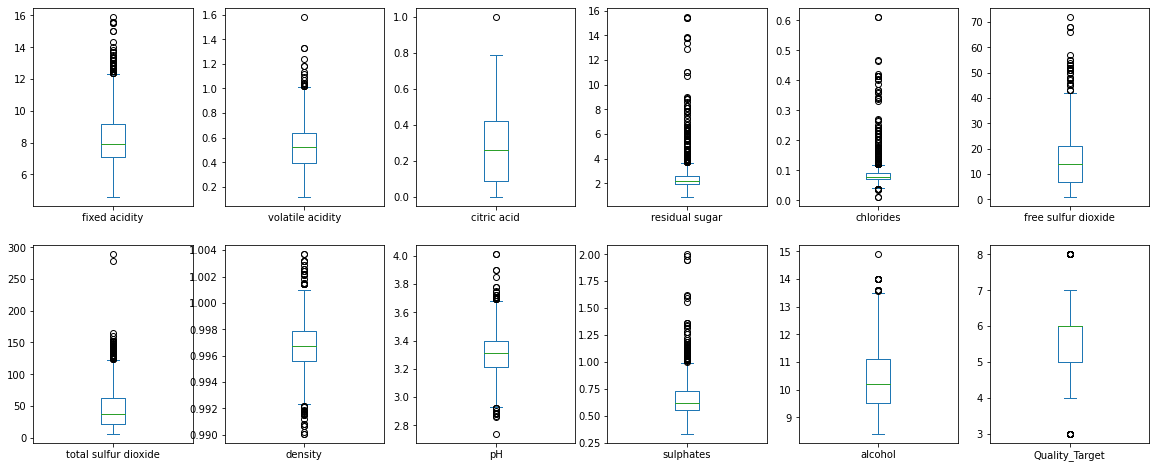

In [106]:
win.plot(kind='box',subplots=True,layout=(2,6),figsize=[20,8])

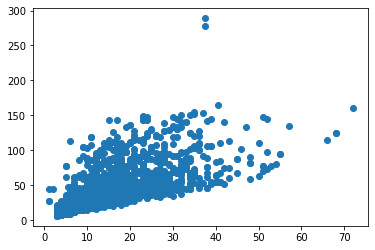

In [107]:
plt.scatter(x=win['free sulfur dioxide'],y=win['total sulfur dioxide'])

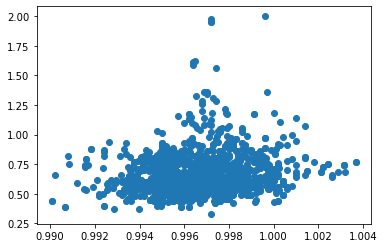

In [108]:
plt.scatter(x=win['density'],y=win['sulphates'])

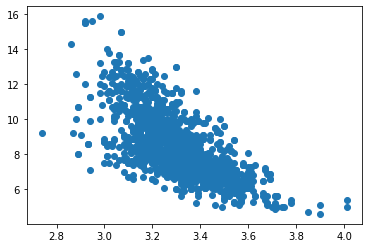

In [109]:
plt.scatter(x=win['pH'],y=win['fixed acidity'])

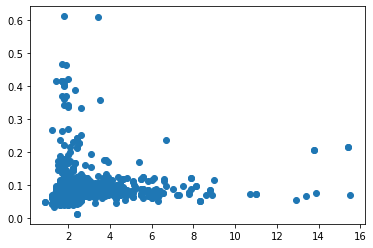

In [110]:
plt.scatter(x=win['residual sugar'],y=win['chlorides'])

Observation-3 

In the above datasets Every coloums has outliers.


1) As we can see, the free sulfur dioxide and total sulfur dioxide columns have outliers. For example, the max free sulfur dioxide is 72 while its mean is 15.87 .The mean is sensitive to outliers but the fact that mean is so small compared to the max value indicates the outliers are peresnt.

2) Similarly, the max total sulfur dioxide is 289 while the mean is 46.4,we can say outliers are present.

3) Same in the density, sulphates, fixed acidity and pH columns have outliers.

4) Few outliers are present in citric acid and alcohol columns.

Checking Skewness :

In [111]:
from scipy.stats import skew

In [112]:
win.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
Quality_Target          0.217802
dtype: float64

fixed acidity
0.9818292953262073


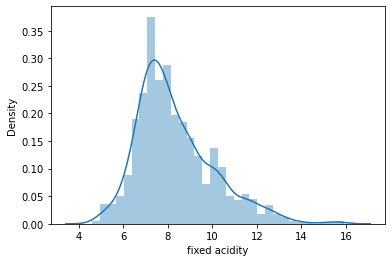

volatile acidity
0.6709623963499574


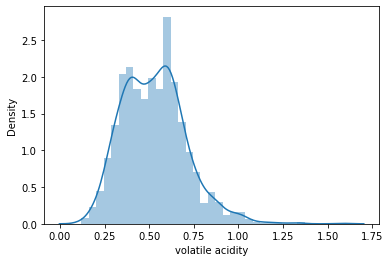

citric acid
0.3180385895475358


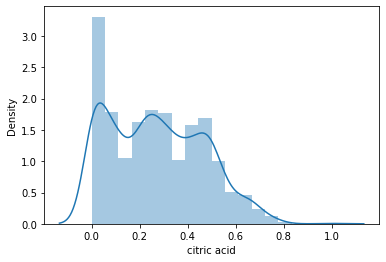

residual sugar
4.536394788805638


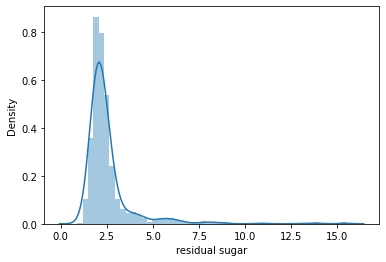

chlorides
5.675016527504258


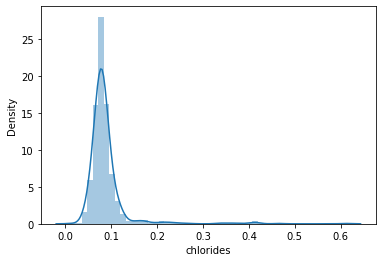

free sulfur dioxide
1.249393847434253


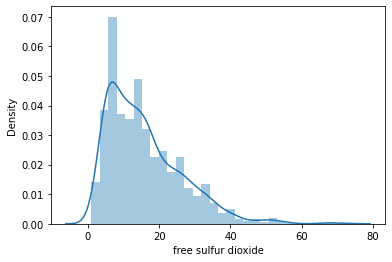

total sulfur dioxide
1.5141091878506638


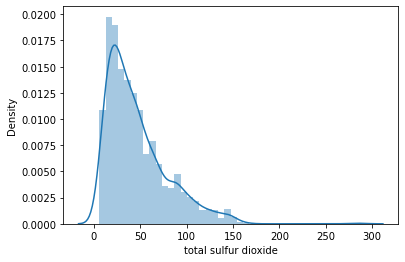

density
0.07122077153539946


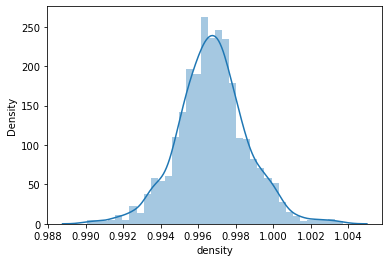

pH
0.19350175891005525


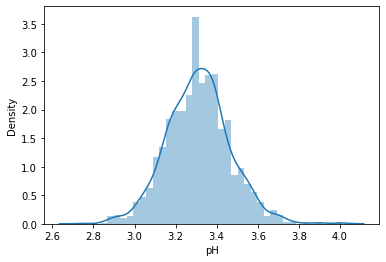

sulphates
2.426393455449087


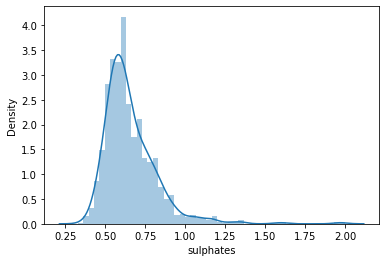

alcohol
0.8600210646566755


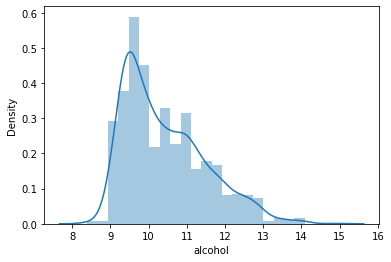

Quality_Target
0.21759720553467285


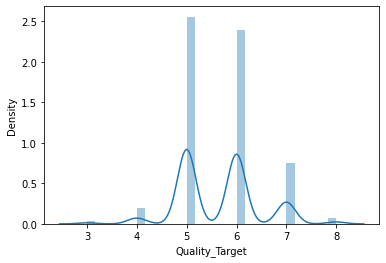

In [113]:
for i in win:
    print(i)
    print(skew(win[i]))
    
    plt.figure()
    sns.distplot(win[i])
    plt.show()


Observation-4 :

In the above dataset most of the columns has skewness :

* High skewness represents data imbalancy.

* Less skewness represents that our data are equally distributed.

1) Chlorides(5.68) and residual sugar(4.54) columns are highly skewded or we can say high skewness are present in these columns.

2) In sulphates(2.42), total sulfur dioxide(1.51) and free sulfur dioxide(1.25) columns are showing high skewness.

3) Fixed acidity(0.98) and alcohol(0.86) column are showing less skewness, we can say these columns has less skewness compared to sulphates, total sulfur dioxide and free sulfur dioxide columns. 

4) Skewness is absent or negligible in pH(0.19), density(0.07), volatile acidity(0.67) and citric acid(0.31) columns.


Checking co-relation 

In [116]:
win.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality_Target
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [117]:
win.corr()['Quality_Target'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
Quality_Target          1.000000
Name: Quality_Target, dtype: float64

<AxesSubplot:>

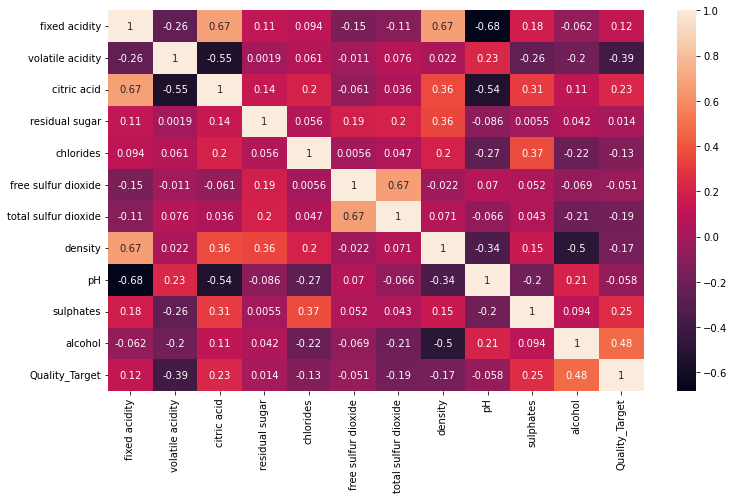

In [139]:
plt.figure(figsize=(12,7))
sns.heatmap(win.corr(),annot=True)

Observation-5 :

From the above outcomes we can say that:

1."Volatile acidity" has negative correlation with the target column which can be considered as a poor bond.

2."Alcohol" has 48 percent correlation with the target column which can be considered as good bond.

3."citric acid" has 23 percent and "sulphates" has 25 percent correlation with the target column which can be considered as normal bond. 

4."Residual sugar" has 0.14 percent correlation with the target which can be considered as a no relation between the columns.

5."Total sulfur dioxide", "free sulfur dioxide", "density" and "chlorides" have negative corelation with target column.

# Data Preprocessing

We are dropping Volatile acidity column because it has very negative correlation with the target column.

In [151]:
win=win.drop(["volatile acidity"],axis=1)

In [152]:
win.columns

Index(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'Quality_Target'],
      dtype='object')

Removing Skewness using Power Transfomation technique

In [153]:
from sklearn.preprocessing import power_transform

In [154]:
win_new=power_transform(win)

In [157]:
win=pd.DataFrame(win_new,columns=win.columns)

In [159]:
win.skew()

fixed acidity           0.002529
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
Quality_Target          0.012134
dtype: float64

Removing Outliers :

In [161]:
import scipy
from scipy.stats import zscore

In [165]:
z=np.abs(zscore(win))
z.shape

(1599, 11)

In [166]:
threshold=3
print(np.where(z>3))

(array([   7,   45,   45,   95,   95,  151,  170,  198,  354,  442,  459,
        469,  480,  517,  517,  544,  544,  554,  555,  557,  608,  614,
        690,  695,  695,  797,  832,  836,  836,  837,  837,  889,  899,
        909,  914, 1017, 1017, 1018, 1018, 1081, 1114, 1269, 1270, 1287,
       1299, 1316, 1316, 1321, 1321, 1369, 1374, 1374, 1434, 1435, 1469,
       1478, 1505, 1571], dtype=int64), array([ 2,  0,  7,  0,  7,  7,  8,  2,  6,  6, 10,  2,  6,  9, 10,  7,  9,
        6,  6,  6,  6,  7, 10,  3,  7,  3, 10,  3,  6,  3,  6,  6, 10,  2,
        2,  2,  6,  2,  6,  5,  6,  6,  6,  8, 10,  2,  7,  2,  7,  8,  2,
       10,  6,  6, 10, 10, 10,  3], dtype=int64))


In [168]:
win_new=win[(z<3).all(axis=1)]

In [169]:
win_new.shape

(1553, 11)

In [170]:
print("old data frame :",win.shape)
print("new data frame :",win_new.shape)
print("total droped rows :",win.shape[0]-win_new.shape[0])

old data frame : (1599, 11)
new data frame : (1553, 11)
total droped rows : 46


In [173]:
loss_percent=((1599-1553)/4177)*100
print(loss_percent,"%")

1.101268853243955 %


In [178]:
x=win_new.iloc[:,0:-1]

In [179]:
y=win_new.iloc[:,-1]

In [180]:
x.shape

(1553, 10)

In [181]:
y.shape

(1553,)

In [207]:
lr=LinearRegression()
from sklearn.metrics import accuracy_score

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [214]:
lr.fit(x_train,y_train)

LinearRegression()

In [215]:
perd=lr.score(x_train,y_train)
perd

0.32944444145759766

In [216]:
print("Error")

print("Mean absolute error :",mean_absolute_error(y_test,perd))
print("Mean squared error : ",mean_squared_error(y_test,perd))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,perd)))

Error


TypeError: Singleton array 0.32944444145759766 cannot be considered a valid collection.

In [217]:
from sklearn.model_selection import cross_val_score

In [218]:
cvs=cross_val_score(lr,x,y,cv=9)
print("cross validation score of linear regression is :",cvs.mean())

cross validation score of linear regression is : 0.23183355484288704
